In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [5]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [8]:
df=pd.read_csv("/kaggle/input/datasett/bank-additional/bank-additional/bank-additional.csv" , delimiter=';')

In [9]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no


In [10]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [11]:
df.rename(columns={'y':'deposit'}, inplace=True)

In [12]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,no
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,no
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,no
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no


In [13]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [15]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
deposit           0
dtype: int64

In [16]:
categorical_cols = df.select_dtypes(include='object').columns
print(categorical_cols)

numerical_cols = df.select_dtypes(exclude='object').columns
print(numerical_cols)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'deposit'],
      dtype='object')
Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')


In [21]:
import matplotlib.pyplot as plt

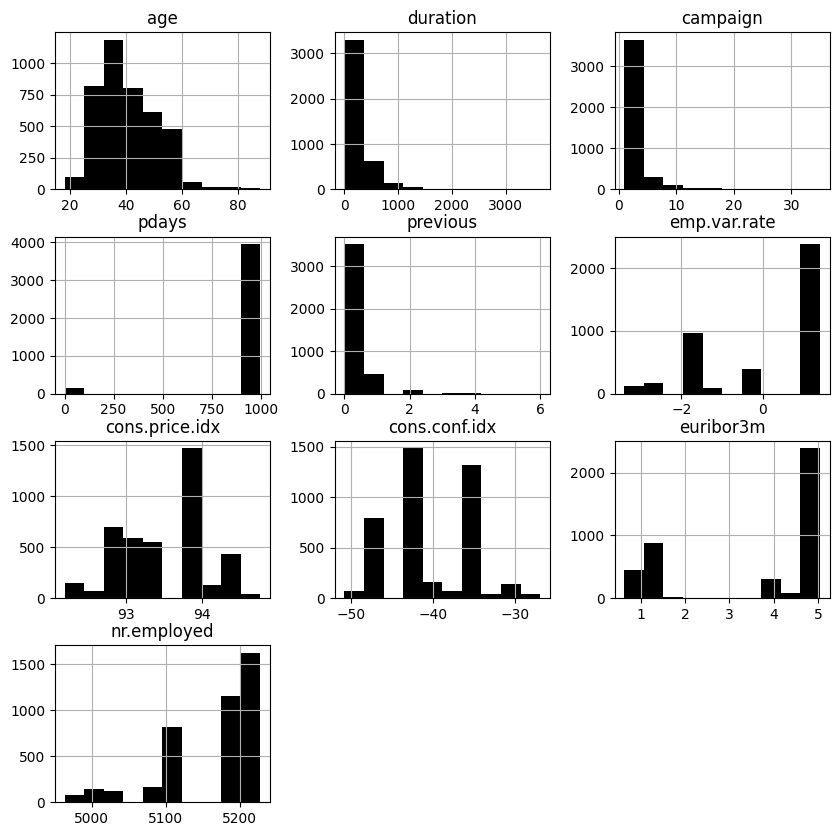

In [24]:
df.hist(figsize=(10,10),color='#000000')
plt.show()

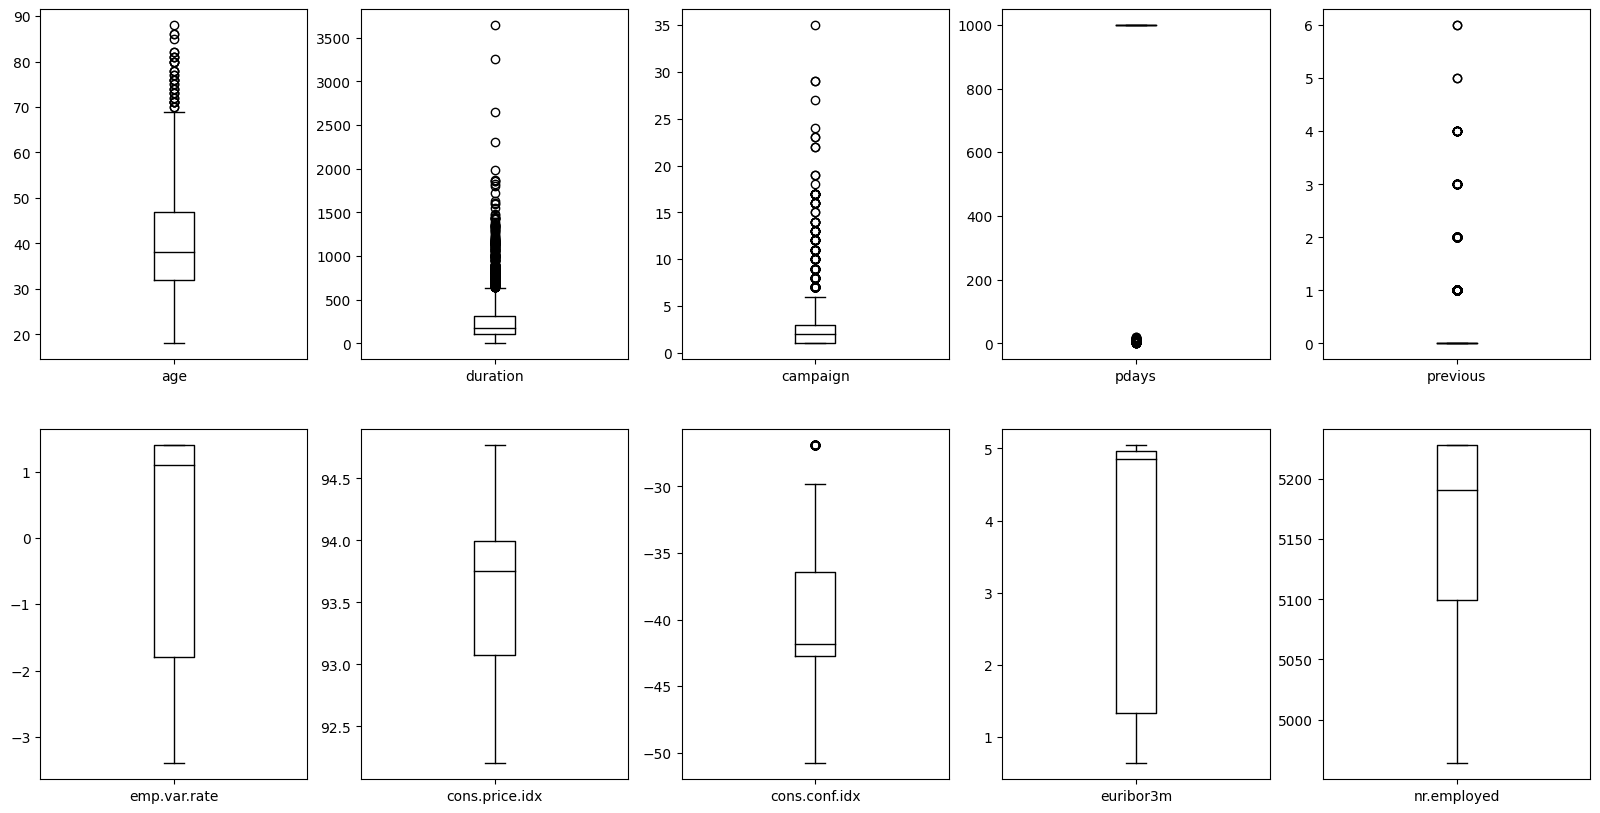

In [25]:
df.plot(kind='box', subplots=True, layout=(2,5),figsize=(20,10),color='#000000')
plt.show()

<Figure size 2000x1000 with 0 Axes>

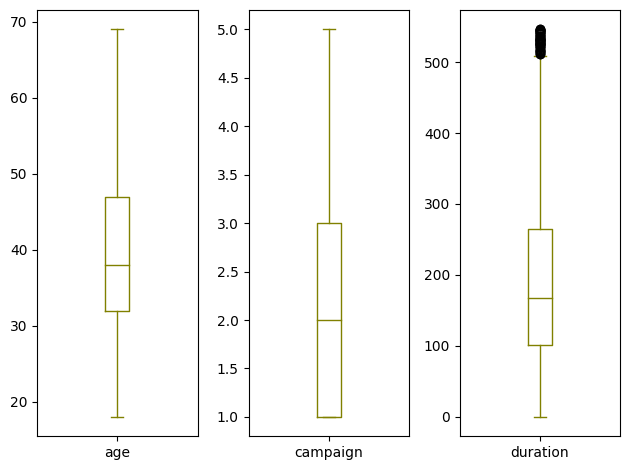

In [50]:
columns = ['age', 'campaign', 'duration']
data = df[columns]

q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

filtered_data = data.apply(lambda x: x[(x > lower_bound[x.name]) & (x < upper_bound[x.name])])

df[columns] = filtered_data

df.dropna(subset=columns, inplace=True)

plt.figure(figsize=(20, 10))
df[columns].plot(kind='box', subplots=True, layout=(1, len(columns)), color='#808000')

plt.tight_layout()
plt.show()


In [29]:
import seaborn as sns

Correlation Matrix:
                     age  duration  campaign     pdays  previous  \
age             1.000000  0.016356  0.011433 -0.000639 -0.004500   
duration        0.016356  1.000000 -0.055525 -0.064131  0.057722   
campaign        0.011433 -0.055525  1.000000  0.050725 -0.076360   
pdays          -0.000639 -0.064131  0.050725  1.000000 -0.571829   
previous       -0.004500  0.057722 -0.076360 -0.571829  1.000000   
emp.var.rate    0.038788 -0.045083  0.105743  0.266943 -0.420390   
cons.price.idx  0.019615  0.011868  0.089926  0.067387 -0.179843   
cons.conf.idx   0.069706 -0.040503 -0.013185 -0.107444 -0.044907   
euribor3m       0.048930 -0.060945  0.090904  0.294694 -0.460343   
nr.employed     0.040380 -0.073782  0.092646  0.372871 -0.513907   

                emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
age                 0.038788        0.019615       0.069706   0.048930   
duration           -0.045083        0.011868      -0.040503  -0.060945   
campaign 

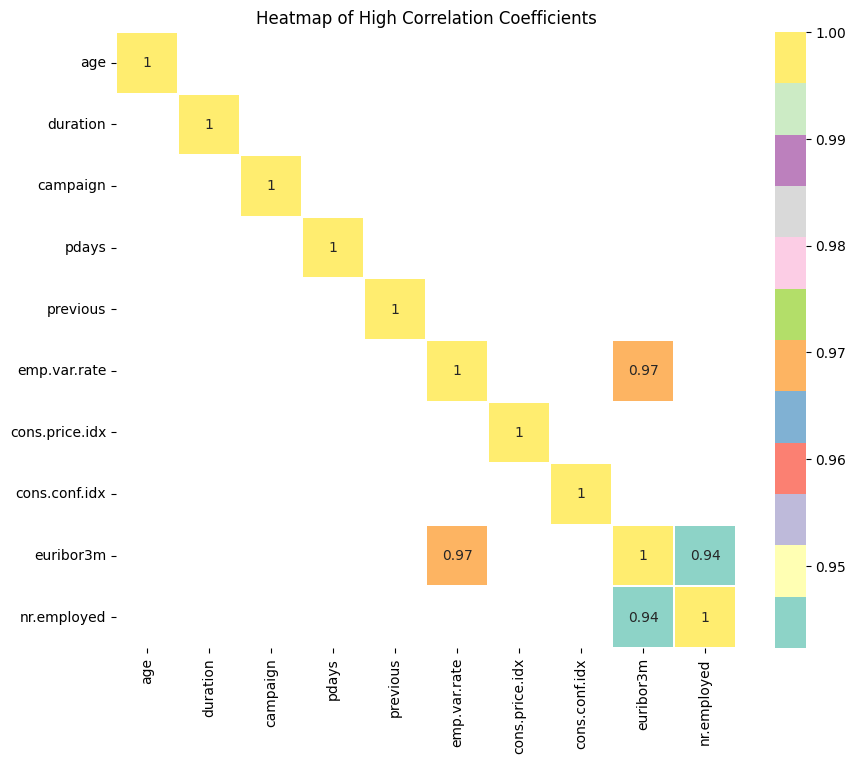

In [30]:
# Exclude non-numeric columns from the DataFrame
numeric_df = df.drop(columns=categorical_cols)

# Compute the correlation matrix for the numeric columns
correlation_matrix = numeric_df.corr()

# Print the correlation matrix to the console
print("Correlation Matrix:")
print(correlation_matrix)

# Filter the correlation matrix to keep only values with absolute correlation >= 0.90
high_corr = correlation_matrix[abs(correlation_matrix) >= 0.90]

# Plot the filtered correlation matrix as a heatmap
plt.figure(figsize=(10, 8))  # Set the figure size
sns.heatmap(high_corr, annot=True, cmap='Set3', linewidths=0.2)

# Display the heatmap
plt.title("Heatmap of High Correlation Coefficients")
plt.show()

In [31]:

df_reduced = df.drop(columns=['euribor3m'])


print(df_reduced.columns)


Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'nr.employed', 'deposit'],
      dtype='object')


In [46]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


high_corr_cols = ['emp.var.rate', 'euribor3m', 'nr.employed']


df_1 = df.copy()


df_1.drop(high_corr_cols, inplace=True, axis=1)  # axis=1 indicates columns


lb = LabelEncoder()


df_encoded = df_1.apply(lb.fit_transform)


print(df_encoded['deposit'].value_counts())


x = df_encoded.drop('deposit', axis=1)  
y = df_encoded['deposit']               


print(f"Shape of x: {x.shape}")
print(f"Shape of y: {y.shape}")
print(f"Type of x: {type(x)}")
print(f"Type of y: {type(y)}")


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)


print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of x_test: {x_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")


deposit
0    3202
1     274
Name: count, dtype: int64
Shape of x: (3476, 17)
Shape of y: (3476,)
Type of x: <class 'pandas.core.frame.DataFrame'>
Type of y: <class 'pandas.core.series.Series'>
Shape of x_train: (2607, 17)
Shape of x_test: (869, 17)
Shape of y_train: (2607,)
Shape of y_test: (869,)


In [47]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


print("Classification Report:")
print(classification_report(y_test, y_pred))


print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.9125431530494822
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       789
           1       0.52      0.54      0.53        80

    accuracy                           0.91       869
   macro avg       0.74      0.74      0.74       869
weighted avg       0.91      0.91      0.91       869

Confusion Matrix:
[[750  39]
 [ 37  43]]


Feature Names: Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'cons.price.idx', 'cons.conf.idx'],
      dtype='object')
Class Names: ['no', 'yes']


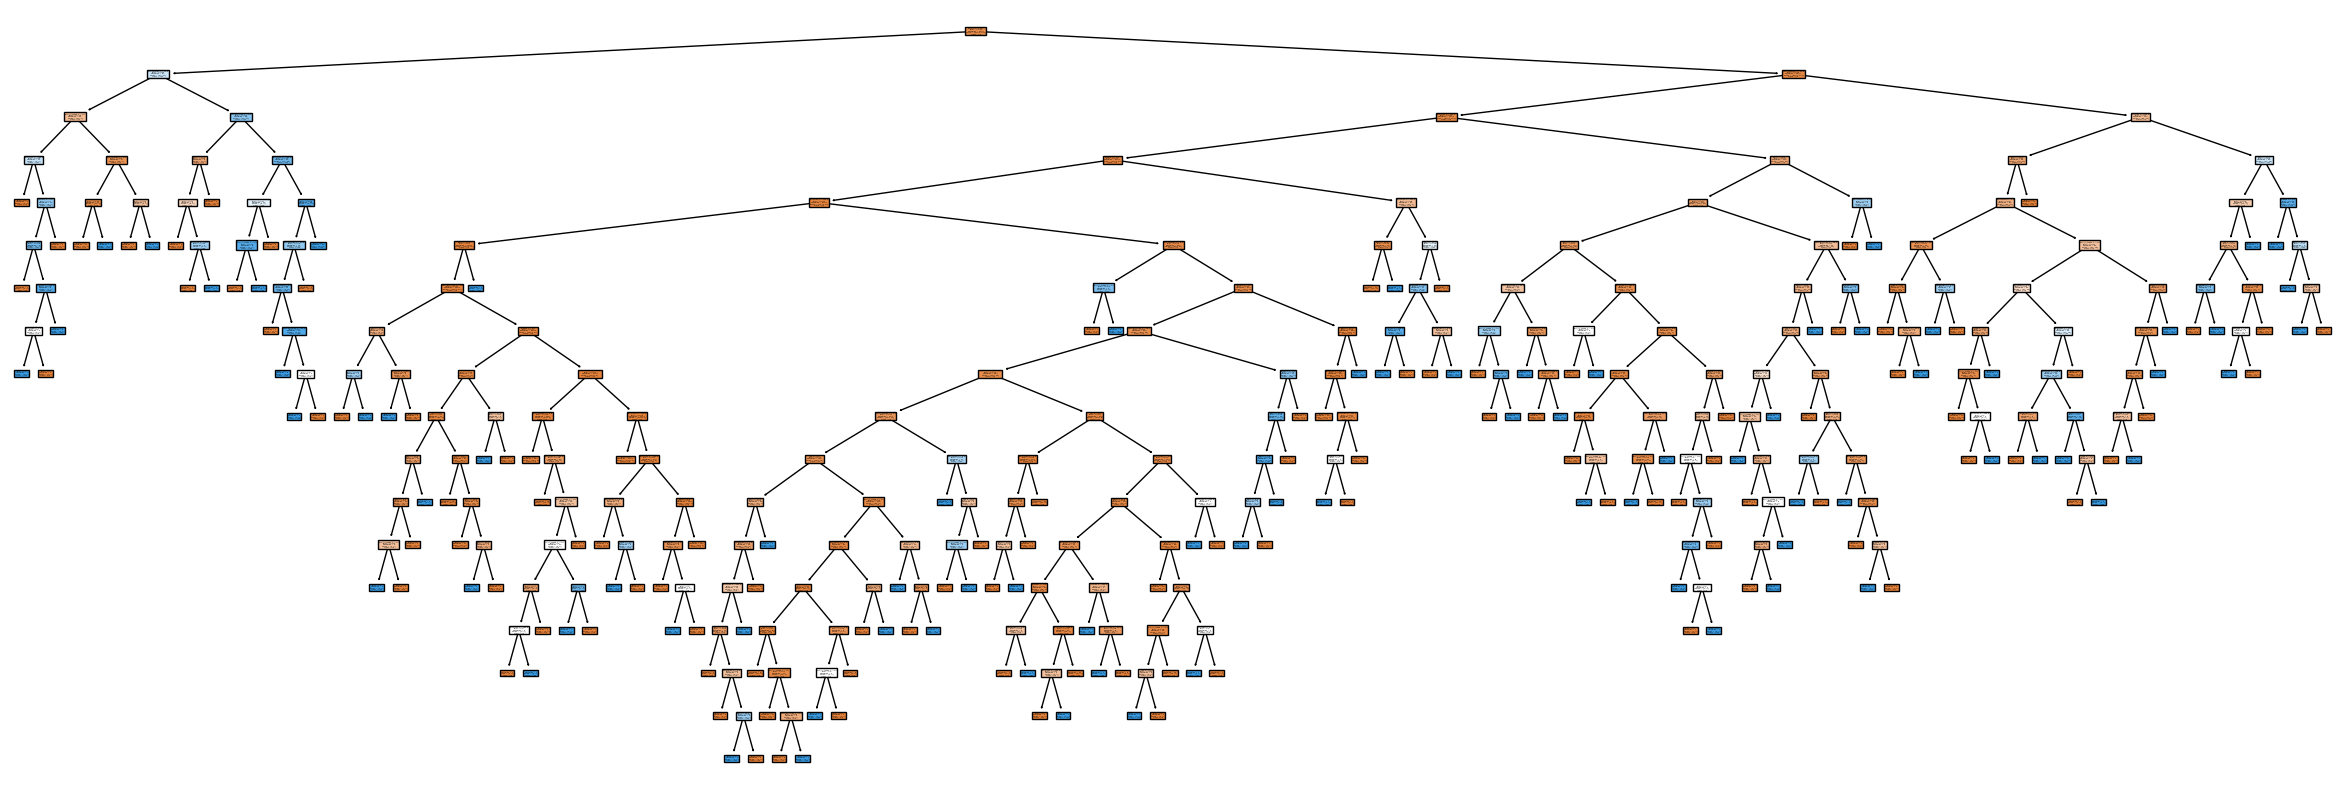

In [48]:


dt = DecisionTreeClassifier(random_state=1)
dt.fit(x_train, y_train)


class_names = ['no', 'yes']
feature_names = x_train.columns


print("Feature Names:", feature_names)
print("Class Names:", class_names)


plt.figure(figsize=(30, 10))
plot_tree(dt, class_names=class_names, feature_names=feature_names, filled=True)
plt.show()

In [49]:


dt1 = DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_split=15)
dt1.fit(x_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_split=15)

Training Score: 0.9413118527042578
Testing Score: 0.9240506329113924
Accuracy: 0.9240506329113924
Confusion Matrix:
[[777  12]
 [ 54  26]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       789
           1       0.68      0.33      0.44        80

    accuracy                           0.92       869
   macro avg       0.81      0.65      0.70       869
weighted avg       0.91      0.92      0.91       869



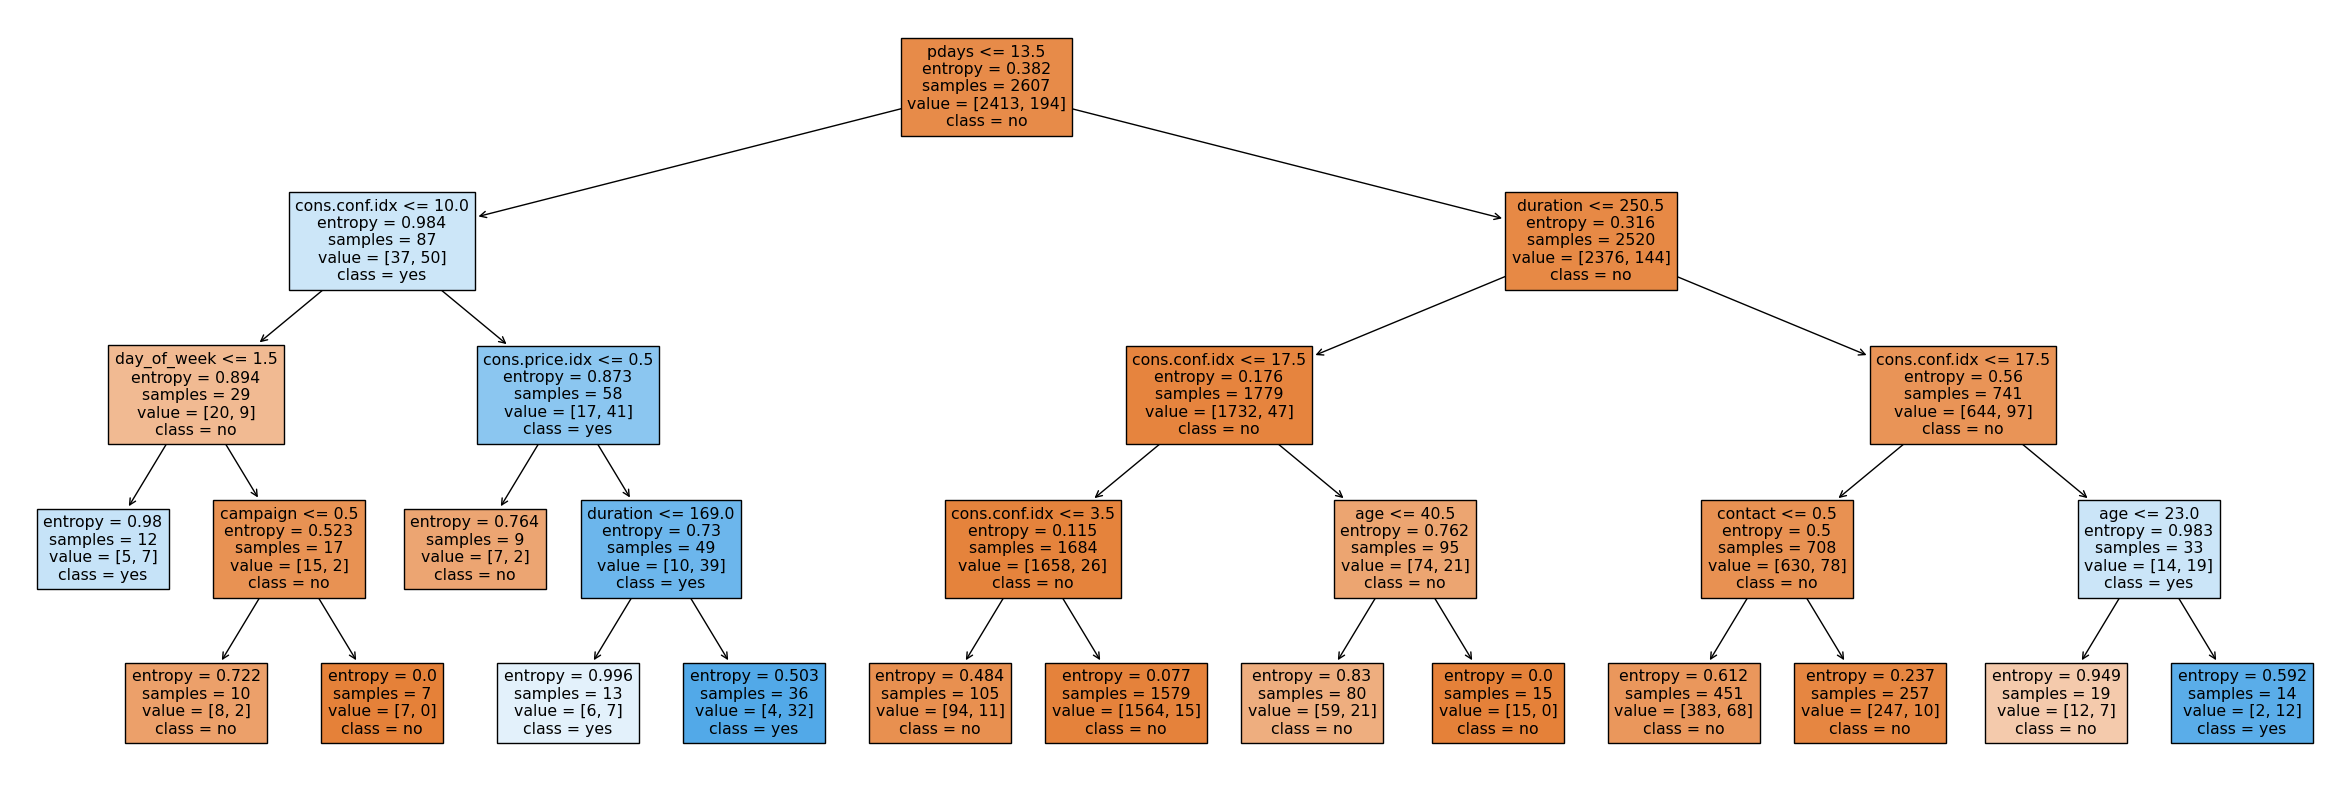

In [44]:


def mscore(model):
    train_score = model.score(x_train, y_train)
    test_score = model.score(x_test, y_test)
    print(f"Training Score: {train_score}")
    print(f"Testing Score: {test_score}")


def eval_model(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred)
    cr = classification_report(y_true, y_pred)
    print(f"Accuracy: {acc}")
    print(f"Confusion Matrix:\n{cm}")
    print(f"Classification Report:\n{cr}")


mscore(dt1)


ypred_dt1 = dt1.predict(x_test)


eval_model(y_test, ypred_dt1)


class_names = ['no', 'yes']
feature_names = x_train.columns


plt.figure(figsize=(30, 10))
plot_tree(dt1, class_names=class_names, feature_names=feature_names, filled=True)
plt.show()